In [1]:
import torch

torch.__version__

'2.0.1'

## 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4, 2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


무작위로 초기화된 텐서

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.5817, 0.6150],
        [0.6206, 0.1391],
        [0.2404, 0.7883],
        [0.2618, 0.7602]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [13]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [14]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [15]:
x = torch.randn_like(x, dtype=torch.float) # randn_like : 같은 크기
print(x)

tensor([[ 0.5268, -0.6141, -0.5529, -0.7373],
        [ 1.3448,  0.4338, -0.0226, -0.4550]])


텐서의 크기 계산

In [16]:
print(x.size())

torch.Size([2, 4])


## 데이터 타입(Data Type)
| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [17]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [19]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [20]:
it = torch.IntTensor([1, 2, 3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [21]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


## CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [24]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.8723])
0.8723021745681763
torch.float32


In [26]:
# torch.cuda.is_available()
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps


In [28]:
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu'), torch.double)

tensor([1.], device='mps:0')
tensor([0.8723], device='mps:0')
tensor([1.8723], device='mps:0')
tensor([1.8723]) torch.float64


## 다차원 텐서 표현

### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [29]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


### 1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [30]:
t1 = torch.tensor([1, 2, 3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


### 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두 개의 축이 존재 
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(sample)과 특성(feature)을 가진 구조로 사용
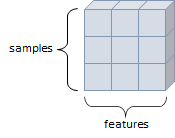

In [32]:
t2 = torch.tensor([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 3D Tensor
- 큐브(cube)와 같은 모양으로 세 개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(sample), 타임스텝(time steps), 특성(features)을 가진 구조로 사용
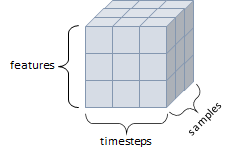

In [33]:
t3 = torch.tensor([[[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]],
                   [[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]],
                   [[1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용
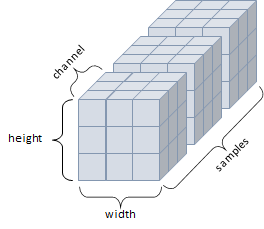

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프레임(frames), 높아(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

## 텐서의 연산(Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [39]:
import math

a = torch.rand(1, 2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[0.6093, 0.9157]])
tensor([[0.6093, 0.9157]])
tensor([[1., 1.]])
tensor([[0., 0.]])
tensor([[0.5000, 0.5000]])


In [42]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) # product 계산
print(torch.unique(torch.tensor([1, 2, 3, 1, 2, 2])))

tensor([[0.6093, 0.9157]])
tensor(0.6093)
tensor(0.9157)
tensor(0.7625)
tensor(0.2167)
tensor(0.5580)
tensor([1, 2, 3])


max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax : 최대값을 가진 인덱스
- argmin : 최소값을 가진 인덱스

In [43]:
x = torch.rand(2, 2)
print(x)
print(x.max(dim=0)) # 0.7820과 0.7184 비교
print(x.max(dim=1)) # 0.7820과 0.1306 비교

tensor([[0.7820, 0.1306],
        [0.7184, 0.1092]])
torch.return_types.max(
values=tensor([0.7820, 0.1306]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.7820, 0.7184]),
indices=tensor([0, 0]))


In [44]:
x = torch.rand(2, 2)
print(x)
print(x.min(dim=0)) # 0.7820과 0.7184 비교
print(x.min(dim=1)) # 0.7820과 0.1306 비교

tensor([[0.7472, 0.4846],
        [0.6122, 0.2054]])
torch.return_types.min(
values=tensor([0.6122, 0.2054]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.4846, 0.2054]),
indices=tensor([1, 1]))


In [45]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)


tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.2601, 0.1089],
        [0.3101, 0.1282]])


torch.add : 덧셈

In [47]:
print(x + y)
print(torch.add(x, y))

tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])


결과 텐서를 인자로 제공

In [50]:
result = torch.empty(2, 4)
print(result)
torch.add(x, y, out=result)
print(result)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])


/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_16388/1506283865.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Resize.cpp:33.)
  torch.add(x, y, out=result)


in-place 방식
- in-place 방식으로 텐서의 값을 변경하는 연산 뒤에 _"가 붙음
- x.copy_(y), x.t_()

In [51]:
print(x)
print(y)
y.add_(x) # y에 값을 x에 더한 값을 y에 저장
print(y)

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.2601, 0.1089],
        [0.3101, 0.1282]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])


torch.sub : 뺄셈

In [52]:
print(x)
print(y)
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[-0.2601, -0.1089],
        [-0.3101, -0.1282]])
tensor([[-0.2601, -0.1089],
        [-0.3101, -0.1282]])
tensor([[-0.2601, -0.1089],
        [-0.3101, -0.1282]])


torch.mul : 곱셈

In [53]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.2762, 1.0609],
        [0.1105, 0.7263]])
tensor([[0.2762, 1.0609],
        [0.1105, 0.7263]])
tensor([[0.2762, 1.0609],
        [0.1105, 0.7263]])


torch.div : 나눗셈

In [54]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.6126, 0.8997],
        [0.4058, 0.8605]])
tensor([[0.6126, 0.8997],
        [0.4058, 0.8605]])
tensor([[0.6126, 0.8997],
        [0.4058, 0.8605]])


torch.mm : 내적(dot product)

In [55]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # 행렬 분해?

tensor([[0.4113, 0.9770],
        [0.2118, 0.7906]])
tensor([[0.6714, 1.0859],
        [0.5218, 0.9187]])
tensor([[0.7860, 1.3442],
        [0.5547, 0.9563]])
tensor([[0.7860, 1.3442],
        [0.5547, 0.9563]])
torch.return_types.svd(
U=tensor([[-0.8154, -0.5789],
        [-0.5789,  0.8154]]),
S=tensor([1.9097, 0.0031]),
V=tensor([[-0.5038, -0.8638],
        [-0.8638,  0.5038]]))


## 텐서의 조작(Manipulations)

### 인덱싱(Indexing): Numpy처럼 인덱싱 형태로 사용가능

In [59]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


view : 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [64]:
x = torch.randn(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1) # 5개를 지정할테니 -1 나머지는 알아서 해줘
print(z)

tensor([[-1.1115,  1.2062, -0.5737,  0.2849, -0.2363],
        [-0.1616,  1.1897,  0.2586,  1.2292,  0.4906],
        [-0.1103, -2.1443, -0.7421, -1.3547, -0.2947],
        [ 0.8718, -0.2334,  2.0125,  0.5583,  0.6020]])
tensor([-1.1115,  1.2062, -0.5737,  0.2849, -0.2363, -0.1616,  1.1897,  0.2586,
         1.2292,  0.4906, -0.1103, -2.1443, -0.7421, -1.3547, -0.2947,  0.8718,
        -0.2334,  2.0125,  0.5583,  0.6020])
tensor([[-1.1115,  1.2062, -0.5737,  0.2849],
        [-0.2363, -0.1616,  1.1897,  0.2586],
        [ 1.2292,  0.4906, -0.1103, -2.1443],
        [-0.7421, -1.3547, -0.2947,  0.8718],
        [-0.2334,  2.0125,  0.5583,  0.6020]])


item : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [65]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.2780])
1.2780425548553467
torch.float32


스칼라값 하나만 존재해야 item() 사용 가능

In [67]:
x = torch.randn(2)
print(x)
# print(x.item())
# RuntimeError: a Tensor with 2 elements cannot be converted to Scalar
print(x.dtype)

tensor([-0.6660,  2.0794])
torch.float32


squeeze : 차원을 축소(제거)

In [68]:
tensor = torch.rand(1, 3, 3) # 1 x 3 x 3
print(tensor)
print(tensor.shape)

tensor([[[0.8818, 0.6045, 0.6971],
         [0.2611, 0.0606, 0.0899],
         [0.3329, 0.2897, 0.4258]]])
torch.Size([1, 3, 3])


In [69]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.8818, 0.6045, 0.6971],
        [0.2611, 0.0606, 0.0899],
        [0.3329, 0.2897, 0.4258]])
torch.Size([3, 3])


unsqueeze : 차원을 증가(생성)

In [70]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.0509, 0.5194, 0.2714],
        [0.2095, 0.1421, 0.8488],
        [0.8263, 0.8785, 0.5627]])
torch.Size([3, 3])


In [71]:
tensor = t.unsqueeze(dim=0) # 첫 번째 차원을 기준으로 unsqueeze
print(tensor)
print(tensor.shape)

tensor([[[0.0509, 0.5194, 0.2714],
         [0.2095, 0.1421, 0.8488],
         [0.8263, 0.8785, 0.5627]]])
torch.Size([1, 3, 3])


In [72]:
tensor = t.unsqueeze(dim=2) # 세 번째 차원을 기준으로 unsqueeze
print(tensor)
print(tensor.shape)

tensor([[[0.0509],
         [0.5194],
         [0.2714]],

        [[0.2095],
         [0.1421],
         [0.8488]],

        [[0.8263],
         [0.8785],
         [0.5627]]])
torch.Size([3, 3, 1])


stack : 텐서간 결합

In [73]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [75]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)

c = torch.cat((a, b), dim=0) # 첫 번째 차원 기준
print(c)
print(c.size())

tensor([[[ 1.5696,  0.9413,  0.4731],
         [ 0.6237, -0.2159, -1.5907],
         [ 1.3120, -1.5403, -0.7232]]])
tensor([[[ 0.5033,  1.2308,  0.9866],
         [-1.7712,  1.3228, -1.0307],
         [ 1.8235,  0.1754, -0.1697]]])
tensor([[[ 1.5696,  0.9413,  0.4731],
         [ 0.6237, -0.2159, -1.5907],
         [ 1.3120, -1.5403, -0.7232]],

        [[ 0.5033,  1.2308,  0.9866],
         [-1.7712,  1.3228, -1.0307],
         [ 1.8235,  0.1754, -0.1697]]])
torch.Size([2, 3, 3])


In [76]:
c = torch.cat((a, b), dim=1) # 두 번째 차원 기준
print(c)
print(c.size())

tensor([[[ 1.5696,  0.9413,  0.4731],
         [ 0.6237, -0.2159, -1.5907],
         [ 1.3120, -1.5403, -0.7232],
         [ 0.5033,  1.2308,  0.9866],
         [-1.7712,  1.3228, -1.0307],
         [ 1.8235,  0.1754, -0.1697]]])
torch.Size([1, 6, 3])


In [77]:
c = torch.cat((a, b), dim=2) # 세 번째 차원 기준
print(c)
print(c.size())

tensor([[[ 1.5696,  0.9413,  0.4731,  0.5033,  1.2308,  0.9866],
         [ 0.6237, -0.2159, -1.5907, -1.7712,  1.3228, -1.0307],
         [ 1.3120, -1.5403, -0.7232,  1.8235,  0.1754, -0.1697]]])
torch.Size([1, 3, 6])


chunk : 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [82]:
print(torch.rand(1, 2))
print(torch.randn(1, 2))

tensor([[0.5893, 0.7150]])
tensor([[-0.2001,  0.0777]])


In [87]:
tensor = torch.rand(3, 6)
print(tensor)
print()

t1, t2, t3 = torch.chunk(tensor, chunks=3, dim=1) # 두 번째 차원 기준
# chunks=3 : 3부분으로 나눈다
print(t1)
print(t2)
print(t3)

tensor([[0.7674, 0.7503, 0.7651, 0.3907, 0.4330, 0.5340],
        [0.7142, 0.9749, 0.9966, 0.0841, 0.2173, 0.0897],
        [0.1859, 0.5890, 0.3124, 0.4185, 0.9182, 0.3102]])

tensor([[0.7674, 0.7503],
        [0.7142, 0.9749],
        [0.1859, 0.5890]])
tensor([[0.7651, 0.3907],
        [0.9966, 0.0841],
        [0.3124, 0.4185]])
tensor([[0.4330, 0.5340],
        [0.2173, 0.0897],
        [0.9182, 0.3102]])


split : chunk와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [89]:
tensor = torch.rand(3, 6)
print(tensor)
print()

t1, t2 = torch.split(tensor, split_size_or_sections=3, dim=1)
# split_size_or_sections=3 : 3의 크기로 나눈다
print(t1)
print(t2)

tensor([[0.7281, 0.8277, 0.6886, 0.0077, 0.2406, 0.3315],
        [0.0057, 0.9933, 0.5972, 0.7085, 0.2679, 0.0937],
        [0.3427, 0.3659, 0.7071, 0.2790, 0.9554, 0.3635]])

tensor([[0.7281, 0.8277, 0.6886],
        [0.0057, 0.9933, 0.5972],
        [0.3427, 0.3659, 0.7071]])
tensor([[0.0077, 0.2406, 0.3315],
        [0.7085, 0.2679, 0.0937],
        [0.2790, 0.9554, 0.3635]])


torch <-> numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능
    - `numpy()`
    - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [91]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [92]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [94]:
a.add_(1)
print(a)
print(b) # numpy array는 메모리 공간을 공유하기 때문에 a가 변하면 b도 변함

tensor([3., 3., 3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3. 3. 3.]


In [95]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # add_()
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)
- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_gard` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

requires_grad_(...) 는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경

grad_fn : 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

## 기울기(Gradient)

계산이 완료된 후, `.backward()` 를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

`grad` : data가 거쳐온 layer에 대한 미분값 저장

`with torch.no_grad()` 를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()` 로 감싸면 기울기 계산은 필요 없지만, `requires_grad=True` 로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

`detach()` : 내용물(content)은 같지만 `require_grad` 가 다른 새로운 Tensor를 가져올 때

## 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐